In [94]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import numpy as np
import random
import json

# Read in Daily Article Totals by Year Across the Study Period

In [95]:
df_2015 = pd.read_csv(f'./yearly/overview_2015.csv')
df_2016 = pd.read_csv(f'./yearly/overview_2016.csv')
df_2017 = pd.read_csv(f'./yearly/overview_2017.csv')
df_2018 = pd.read_csv(f'./yearly/overview_2018.csv')

df_2015['Date'] = df_2015['Date'].astype(str)
df_2016['Date'] = df_2016['Date'].astype(str)
df_2017['Date'] = df_2017['Date'].astype(str)
df_2018['Date'] = df_2018['Date'].astype(str)

# Plot Daily Article Totals for Each Year

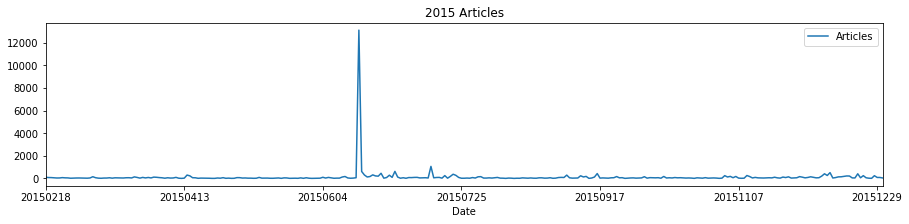

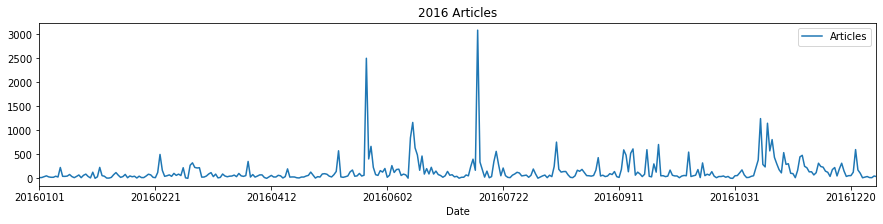

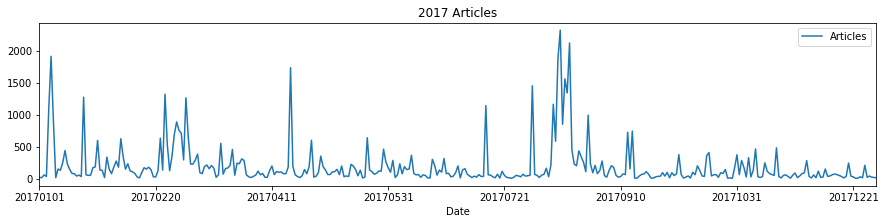

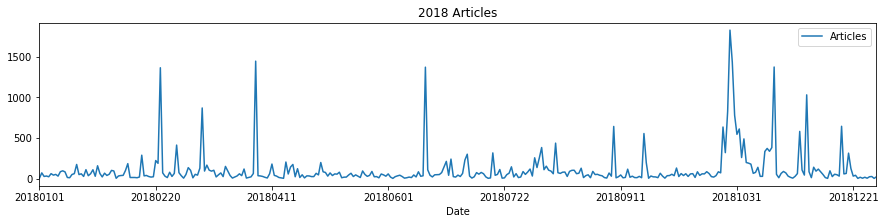

In [96]:
df_2015.plot(x='Date', y='Articles', title='2015 Articles', figsize=(15,3))
df_2016.plot(x='Date', y='Articles', title='2016 Articles', figsize=(15,3))
df_2017.plot(x='Date', y='Articles', title='2017 Articles', figsize=(15,3))
df_2018.plot(x='Date', y='Articles', title='2018 Articles', figsize=(15,3))

# Identifying Emanuel African Methodist Episcopal Church Shooting as Outlier
- There were a total of 13111 (i.e. sum(numarticles)) articles for 20150618. The next 3 highest values for a single day were 3090, 2504, and 2323 articles.

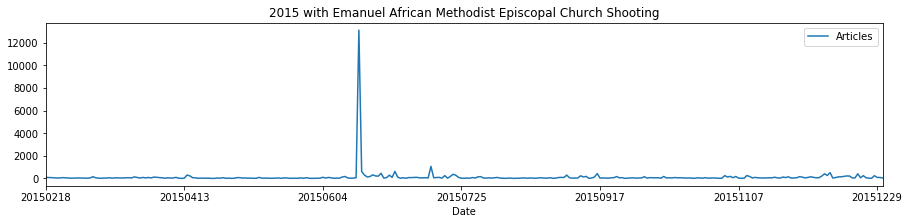

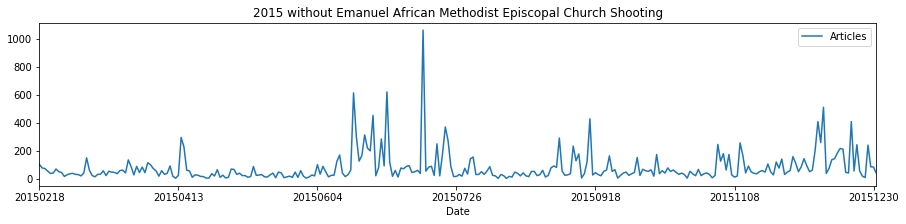

In [97]:
df_2015.plot(x='Date', y='Articles', title='2015 with Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))
df_2015[df_2015.Date != '20150618'].plot(x='Date', y='Articles', title='2015 without Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))

# Daily Articles Across the Study Period

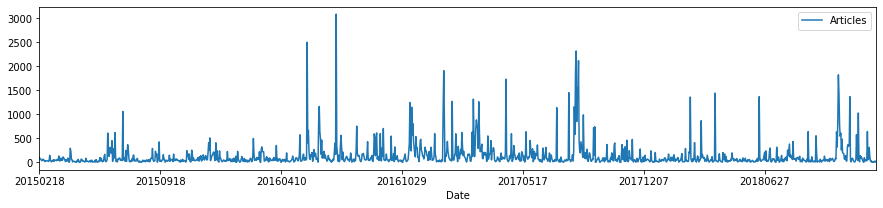

In [98]:
full_df = pd.concat([df_2015, df_2016, df_2017, df_2018])
full_df[full_df.Date != '20150618'].plot(x='Date', y='Articles', figsize=(15, 3))

# Total Articles by Year
- If we remove the shooting at the Emanuel African Methodist Episcoal Church in 2015 as an outlier, there is a drastic jump between 2015 and 2016. We only start to get back to 2015 levels in 2018. 

Year
2015    23924
2016    53500
2017    69604
2018    40584
Name: Articles, dtype: int64


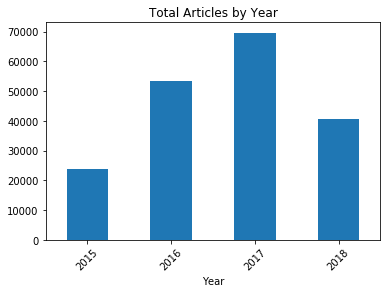

In [99]:
gb = full_df[full_df.Date != '20150618'].groupby('Year')['Articles'].agg('sum')
print(gb)
gb.plot(x='Year', kind='bar', rot=45, title='Total Articles by Year')

In [100]:
gb = full_df[full_df.Date != '20150618'].groupby('Year')['Articles'].agg(['mean', 'median', 'max'])
gb

,mean,median,max
Year,,,
2015,79.218543,46.0,1063
2016,147.790055,66.5,3090
2017,192.808864,79.0,2323
2018,112.421053,50.0,1825


# Load Event Windows & Build Data Frame

In [101]:
events = json.load(open('gdelt_hate.json', 'rb'))

df = pd.DataFrame.from_dict(events).transpose()

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.reset_index(inplace=True)
df.rename(index=str, columns={"index": "start_end"}, inplace=True)

df['start'] = df['start_end'].apply(lambda x: x[:8])
df['end']   = df['start_end'].apply(lambda x: x[-8:])
df['year']  = df['start_end'].apply(lambda x: x[:4])

df.fillna(0, inplace=True)
df.sort_values('start_end', inplace=True)

df

,start_end,length,keywords,articles,ascent,descent,tone,movement,k_0,k_1,...,k_8,k_9,k_10,k_11,k_12,k_13,k_14,start,end,year
0,20150308_20150311,4,"[MUSLIM, VIOLENCE, STATE, DALLAS, TEXAS, SHOOT...",273,1,2,-5.0,53,MUSLIM,VIOLENCE,...,OBAMA,0,0,0,0,0,0,20150308,20150311,2015
1,20150413_20150418,6,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNITY]",672,1,4,-5.0,33,COLLEGE,SHOOTING,...,0,0,0,0,0,0,0,20150413,20150418,2015
2,20150426_20150428,3,"[STUDENT, POSTED, UNIVERSITY]",59,1,1,-4.0,7,STUDENT,POSTED,...,0,0,0,0,0,0,0,20150426,20150428,2015
3,20150428_20150430,3,"[STATEMENT, CAMPUS, UNIVERSITY, STUDENT, DENOU...",93,1,1,-5.0,6,STATEMENT,CAMPUS,...,0,0,0,0,0,0,0,20150428,20150430,2015
4,20150503_20150506,4,"[TEXAS, SPEECH, MUSLIM, GELLER, EVENT, GARLAND]",176,1,2,-5.0,33,TEXAS,SPEECH,...,0,0,0,0,0,0,0,20150503,20150506,2015
5,20150511_20150513,3,"[WRITING, WHITE, COMMUNITY, MUSLIM, CITY]",126,1,1,-4.0,3,WRITING,WHITE,...,0,0,0,0,0,0,0,20150511,20150513,2015
6,20150526_20150528,3,"[RUBIO, SPEECH, DANGER, PRESENT, REAL, MAINSTR...",65,1,1,-2.0,0,RUBIO,SPEECH,...,STATE,0,0,0,0,0,0,20150526,20150528,2015
7,20150603_20150605,3,"[SPEECH, MAN]",152,1,1,-6.0,21,SPEECH,MAN,...,0,0,0,0,0,0,0,20150603,20150605,2015
8,20150611_20150615,5,"[STRATEGY, DOLEZAL, CLINTON, DEPLOYS, BLACK, M...",372,2,2,-4.0,2,STRATEGY,DOLEZAL,...,OFFICE,FAMILY,JONES,MAN,OBAMA,0,0,20150611,20150615,2015
9,20150617_20150627,11,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",15584,1,9,-6.0,58,CHURCH,CHARLESTON,...,0,0,0,0,0,0,0,20150617,20150627,2015


# Plot of Top 10 Windows Based on Total Articles

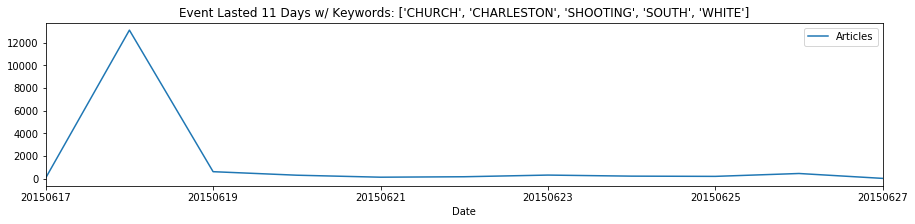

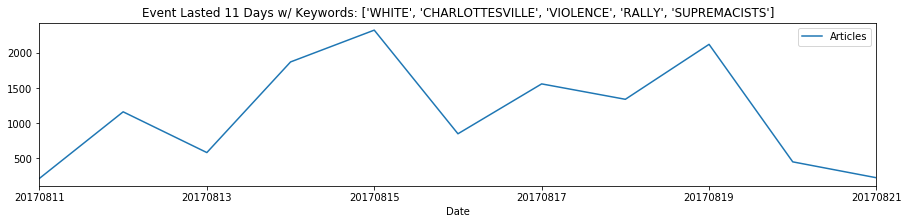

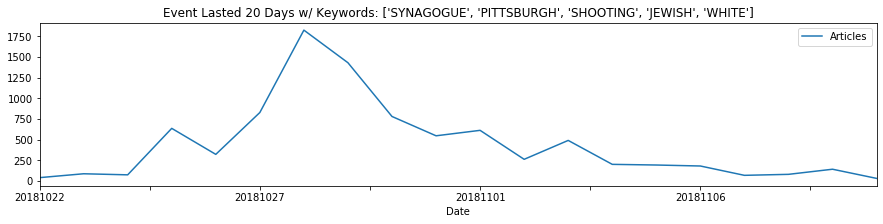

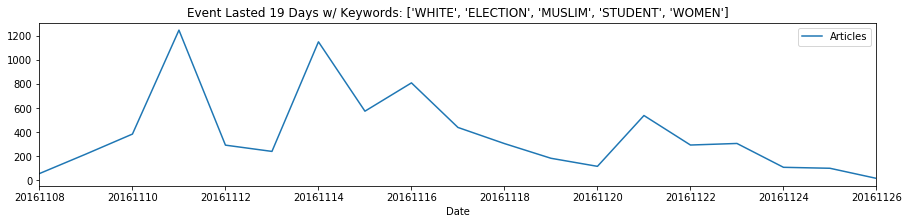

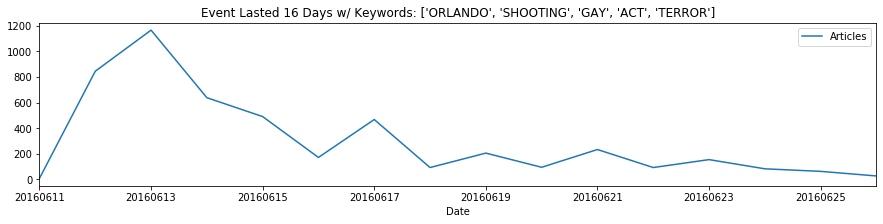

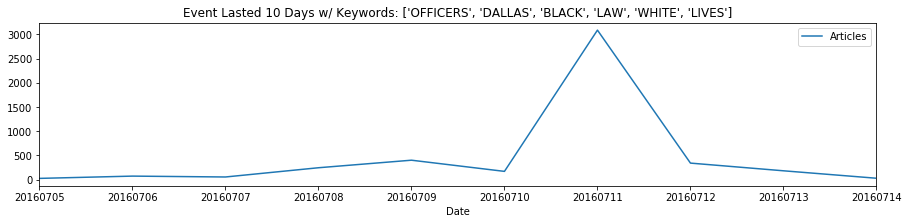

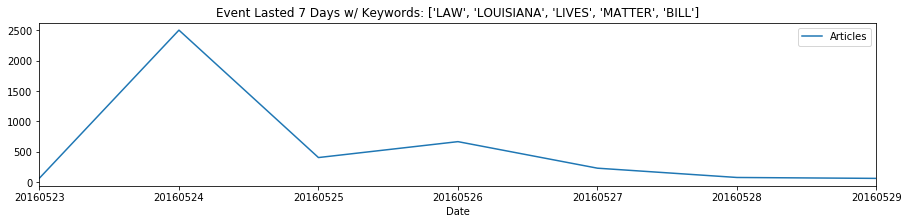

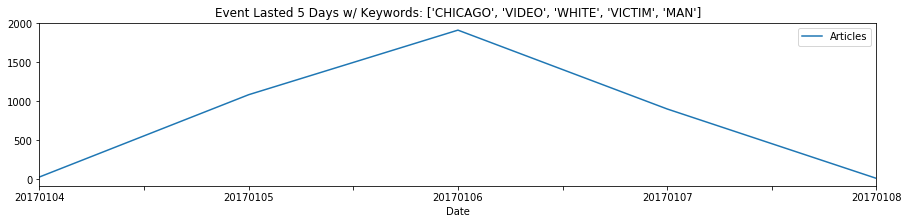

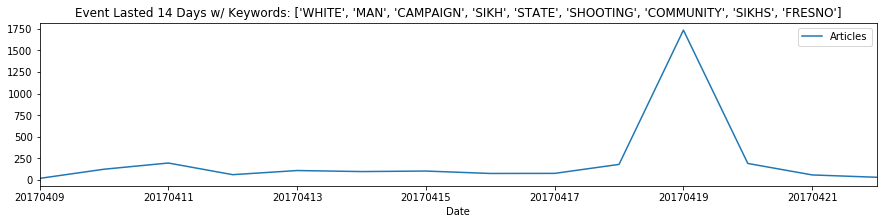

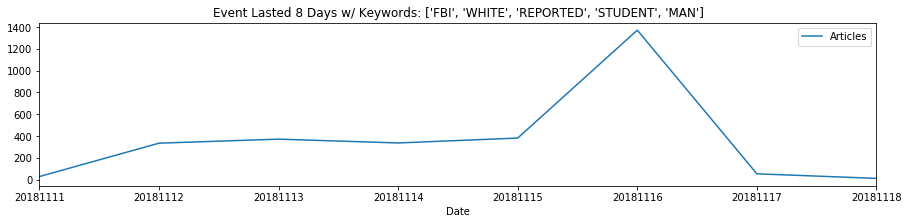

In [102]:
top_windows_by_articles = df.sort_values('articles', ascending=False)[['start_end', 'keywords', 'length']][:10]
for row in top_windows_by_articles.iterrows():
    the_data = row[1]
    start, end = the_data[0].split('_')
    full_df[full_df.Date.between(start, end)].plot(
        title=f'Event Lasted {the_data[2]} Days w/ Keywords: {the_data[1]}',
        x='Date', 
        y='Articles', 
        figsize=(15, 3)
    )

# Plot of Top 10 Windows Based on Descent

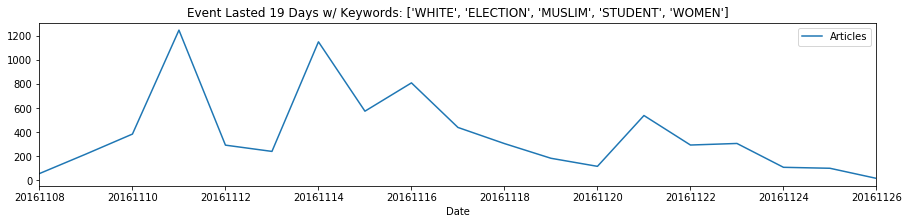

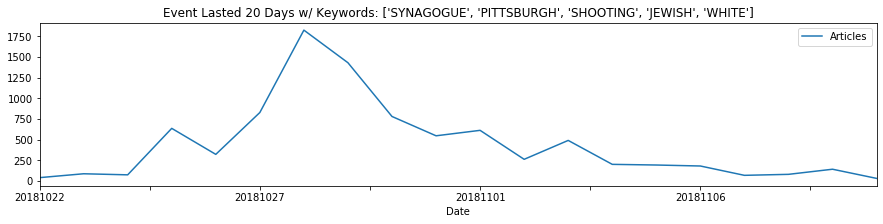

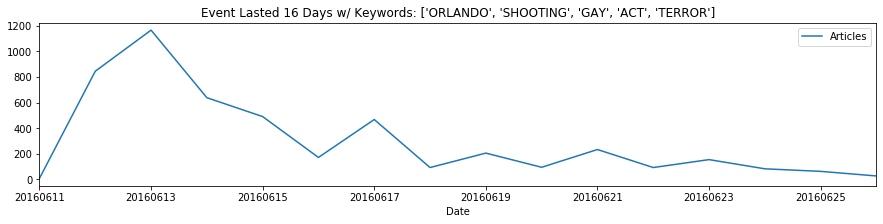

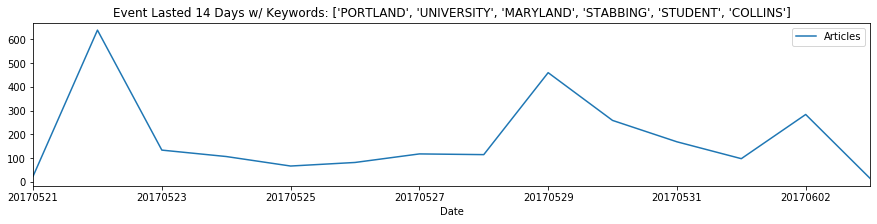

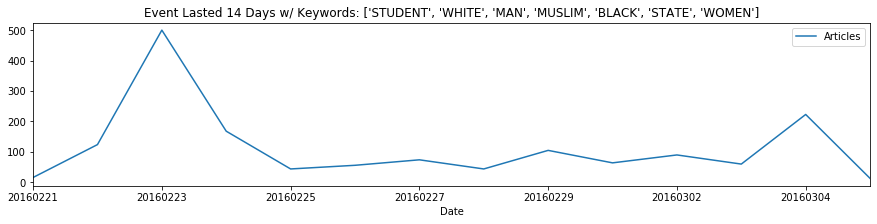

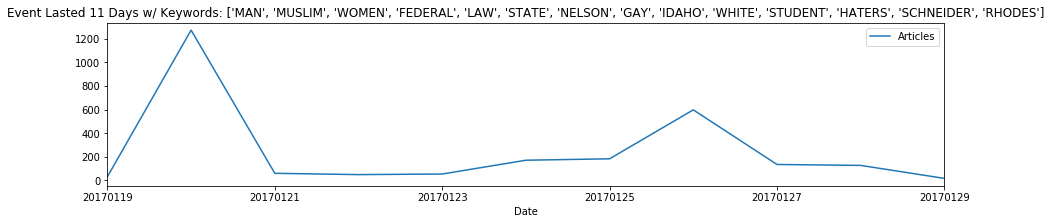

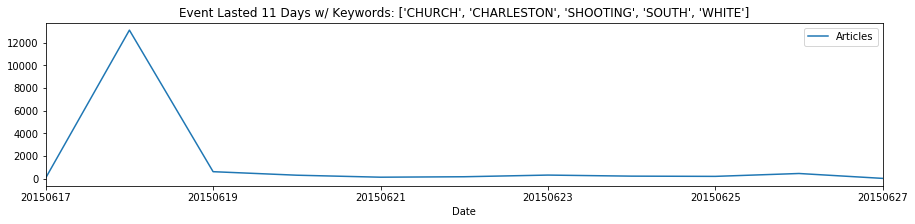

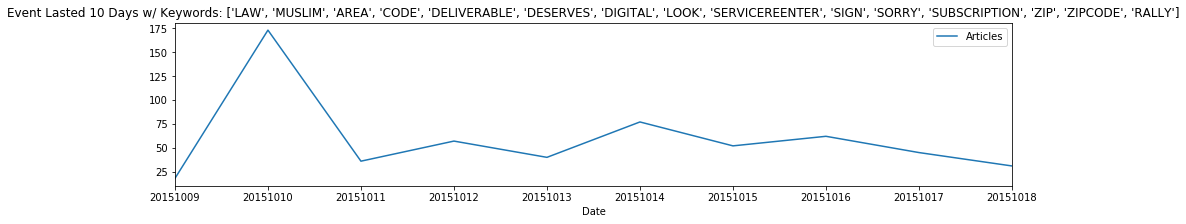

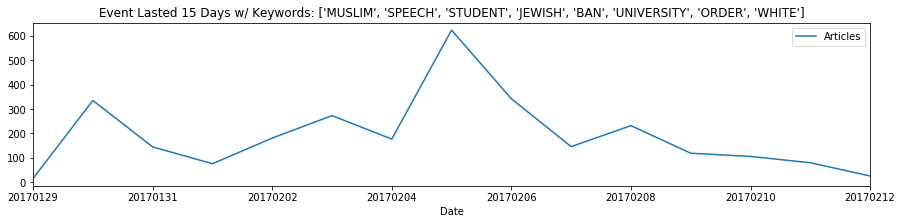

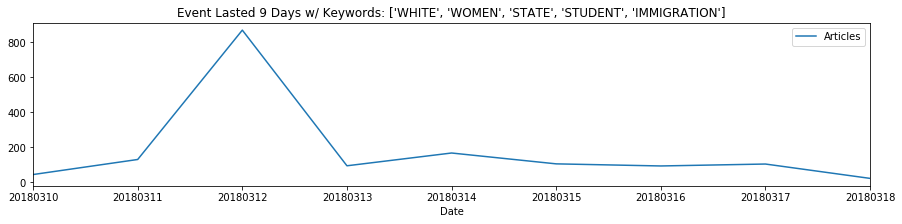

In [103]:
top_windows_by_articles = df.sort_values('descent', ascending=False)[['start_end', 'keywords', 'length']][:10]
for row in top_windows_by_articles.iterrows():
    the_data = row[1]
    start, end = the_data[0].split('_')
    full_df[full_df.Date.between(start, end)].plot(
        title=f'Event Lasted {the_data[2]} Days w/ Keywords: {the_data[1]}',
        x='Date', 
        y='Articles', 
        figsize=(15, 3)
    )

# Count of Windows Across Study Period
- As expected, the number of windows across the study period matches the trend in the total number of articles. However, there were more distinct windows in 2016 than in 2017, even though there were more total articles. This makes sense when compared against the slighter shorted window length in 2016 observed below.

      count
2015     28
2016     32
2017     33
2018     33


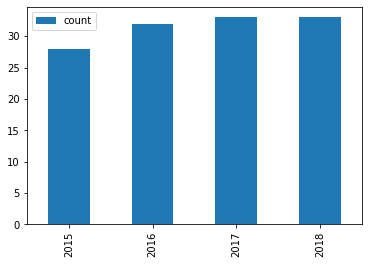

In [104]:
year_counts = df.year.value_counts().to_frame().sort_index()
year_counts.rename(index=str, columns={"year": "count"}, inplace=True)
print(year_counts)
year_counts.plot(kind='bar')

# Filter Outliers for Yearly Metrics
- Emanuel African Methodist Episcopal Church Shooting

In [105]:
metric_df = df[df.start_end != '20150617_20150627']

# General Window Metrics: Articles & Tone by Year
- Median and minimum articles steadily increase over the study period. If there is a new baseline for "hate" in the media, the question becomes whether we are seeing more hate crimes and violent events over time, or if the media is covering intersectional "hate" topics more frequently? We would expect the latter to be true based on the fact that the total number of articles and windows (events) is decreasing over time.
- Tone appears to be stable across time.

In [106]:
gb = metric_df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['articles', 'tone']]
gb.round()

articles                    tone                 
         mean median  min    max mean median  min  max
year                                                  
2015    460.0    372   59   1481 -5.0   -5.0 -8.0 -2.0
2016   1292.0    724  125   7374 -5.0   -5.0 -7.0 -3.0
2017   1525.0    839  137  12701 -6.0   -6.0 -8.0 -4.0
2018    969.0    412   82   8798 -6.0   -6.0 -9.0 -3.0

# General Window Metrics: Ascent, Descent, Length, Movement by Year
- Descent and Length are roughly 3 times higher in 2018 than in 2015.
- Ascent and Movement are roughly 2 times higher in 2018 than in 2015.
- Each of these observations helps validate the statement above that the media is talking more about topics surrounding the term "hate". The next question that will be explored is whether or not we can identify a skew or bias in the keywords taking up most of this narrative.

In [107]:
gb = metric_df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['ascent', 'descent', 'length', 'movement']]
gb.round()

ascent                descent                length                 \
       mean median min max    mean median min max   mean median min max   
year                                                                      
2015    1.0      1   1   4     2.0      2   1   8    5.0      4   3  10   
2016    2.0      1   1   6     4.0      2   1  15    6.0      5   3  19   
2017    2.0      1   1  10     3.0      2   1  12    6.0      5   3  15   
2018    2.0      1   1  10     3.0      2   1  13    5.0      4   3  20   

     movement                  
         mean median min  max  
year                           
2015     29.0   22.0   0  152  
2016     41.0   32.0  10  119  
2017     47.0   33.0   2  191  
2018     38.0   23.0   0  167

# Top Keywords in Windows
- The appearance of Charlottesville is illustrative of the "White Noise" problem. Other citiess (e.g. Charleston, Charlotte, Fresno, ect.) are found in the window keywords, but only Charlottesville, an event where a white man killed a white woman at a white nationalist rally, popped up enough to qualify as a frequently occuring term.
- There is also good reason to believe that "MAN" is often a synonym for "WHITE" in the majority of cases. This will be explored more in the report.
- Our report describes an observable westward migration for the "hate" data across our study period. Seeing "TEXAS" as a keyword (in addition to the supporting aggregated data from SPLC) helps confirm this trend. The next question would be whether or not more violent actions are happening in the west, or if this model is simply seeing more westward coverage of events happenign in the east.

In [108]:
all_keywords = list(chain(*df.keywords))

tk_df = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(all_keywords).items()], columns=['keywords', 'count'])
tk_ag = round(tk_df['count'].mean() * 2)
tk_df = tk_df[tk_df['count'] > tk_ag]
tk_df.sort_values('count', inplace=True, ascending=False)

top_period = [k.split(':')[0] for k in tk_df.keywords]

tk_df[:10]

,keywords,count
23,WHITE: 62,62
32,MAN: 47,47
0,MUSLIM: 40,40
7,STUDENT: 30,30
2,STATE: 29,29
55,WOMEN: 29,29
91,LAW: 27,27
37,BLACK: 19,19
18,SPEECH: 18,18
14,UNIVERSITY: 16,16


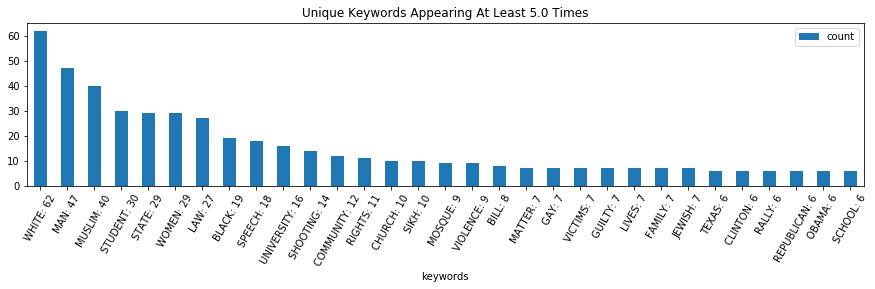

In [109]:
tk_df.plot(x='keywords', y='count', kind='bar', title=f'Unique Keywords Appearing At Least {tk_ag} Times', figsize=(15, 3), rot=60)

# Top Keywords by Year

In [110]:
keys_2015 = list(chain(*df[df.year == '2015'].keywords))

tk_2015 = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(keys_2015).items()], columns=['keywords', 'count'])
tk_ag = round(tk_2015['count'].mean() * 2)
tk_2015 = tk_2015[tk_2015['count'] > tk_ag]
tk_2015.sort_values('count', inplace=True, ascending=False)
tk_2015

,keywords,count
0,MUSLIM: 11,11
23,WHITE: 9,9
32,MAN: 8,8
2,STATE: 5,5
5,SHOOTING: 5,5
7,STUDENT: 5,5
8,OBAMA: 5,5
12,COMMUNITY: 5,5
37,BLACK: 5,5
43,CHURCH: 5,5


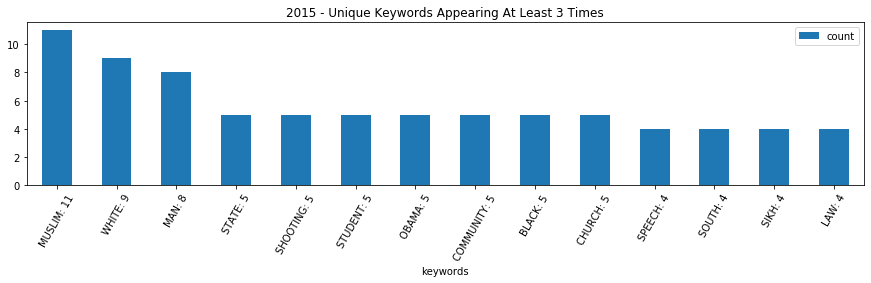

In [111]:
tk_2015.plot(x='keywords', y='count', kind='bar', title=f'2015 - Unique Keywords Appearing At Least {3} Times', figsize=(15, 3), rot=60)

In [112]:
keys_2016 = list(chain(*df[df.year == '2016'].keywords))

tk_2016 = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(keys_2016).items()], columns=['keywords', 'count'])
tk_ag = round(tk_2016['count'].mean() * 2)
tk_2016 = tk_2016[tk_2016['count'] > tk_ag]
tk_2016.sort_values('count', inplace=True, ascending=False)
tk_2016

,keywords,count
0,MUSLIM: 16,16
1,WOMEN: 14,14
26,WHITE: 14,14
9,LAW: 10,10
39,MAN: 10,10
40,BLACK: 10,10
24,STUDENT: 8,8
15,STATE: 6,6
42,REPUBLICAN: 5,5


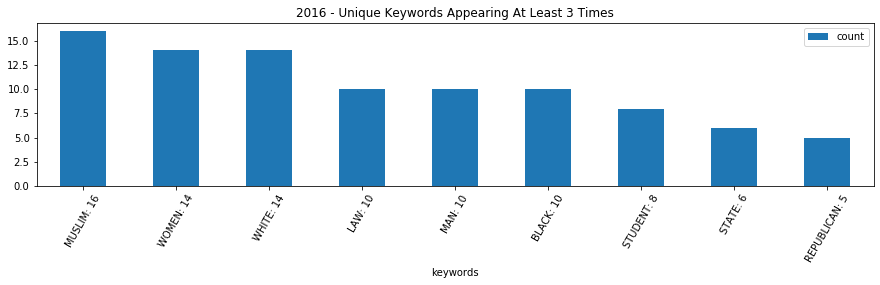

In [113]:
tk_2016.plot(x='keywords', y='count', kind='bar', title=f'2016 - Unique Keywords Appearing At Least {3} Times', figsize=(15, 3), rot=60)

In [114]:
keys_2017 = list(chain(*df[df.year == '2017'].keywords))

tk_2017 = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(keys_2017).items()], columns=['keywords', 'count'])
tk_ag = round(tk_2017['count'].mean() * 2)
tk_2017 = tk_2017[tk_2017['count'] > tk_ag]
tk_2017.sort_values('count', inplace=True, ascending=False)
tk_2017

,keywords,count
2,WHITE: 23,23
4,MAN: 12,12
5,MUSLIM: 12,12
9,STATE: 11,11
20,UNIVERSITY: 8,8
13,STUDENT: 7,7
17,SPEECH: 7,7
30,VIOLENCE: 7,7
52,RIGHTS: 7,7
8,LAW: 6,6


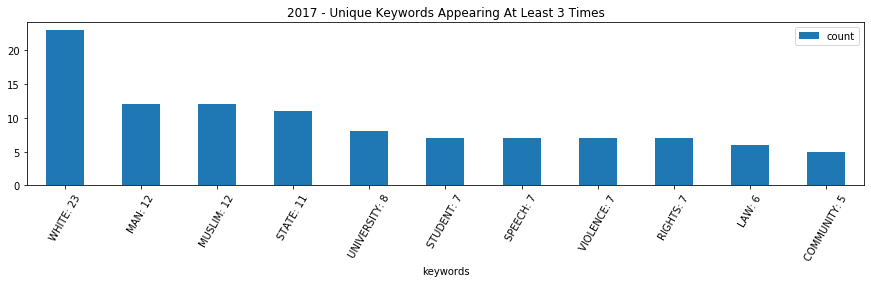

In [115]:
tk_2017.plot(x='keywords', y='count', kind='bar', title=f'2017 - Unique Keywords Appearing At Least {3} Times', figsize=(15, 3), rot=60)

In [116]:
keys_2018 = list(chain(*df[df.year == '2018'].keywords))

tk_2018 = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(keys_2018).items()], columns=['keywords', 'count'])
tk_ag = round(tk_2018['count'].mean() * 2)
tk_2018 = tk_2018[tk_2018['count'] > tk_ag]
tk_2018.sort_values('count', inplace=True, ascending=False)
tk_2018

,keywords,count
22,MAN: 17,17
1,WHITE: 16,16
7,STUDENT: 10,10
70,WOMEN: 8,8
0,LAW: 7,7
63,STATE: 7,7
4,SPEECH: 6,6
2,FACEBOOK: 5,5
29,GUILTY: 4,4
50,JEWISH: 4,4


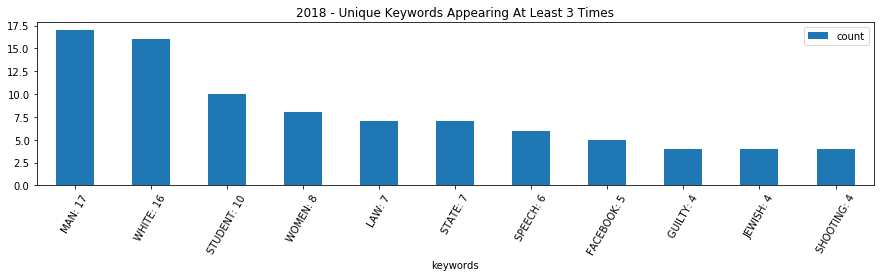

In [117]:
tk_2018.plot(x='keywords', y='count', kind='bar', title=f'2018 - Unique Keywords Appearing At Least {3} Times', figsize=(15, 3), rot=60)

# Visualization - Word Cloud

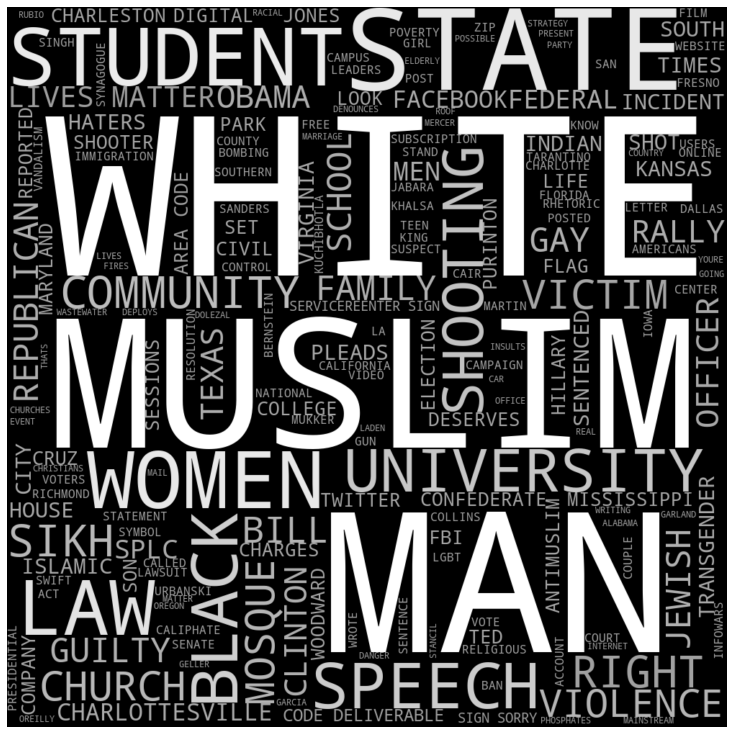

In [118]:
freq_dict = dict(Counter(all_keywords))

def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    try:
        return f"hsl(0, 0%, {freq_dict[word] + max(freq_dict.values())}%)"
    except:
        return f"hsl(0, 0%, {max(freq_dict.values())}%)"


wordcloud = WordCloud(
    width = 1000, 
    height = 1000, 
    min_font_size = 10,
    background_color='black'
)

wordcloud.generate(' '.join(all_keywords))

plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Visualization - Keyword Co-occurence

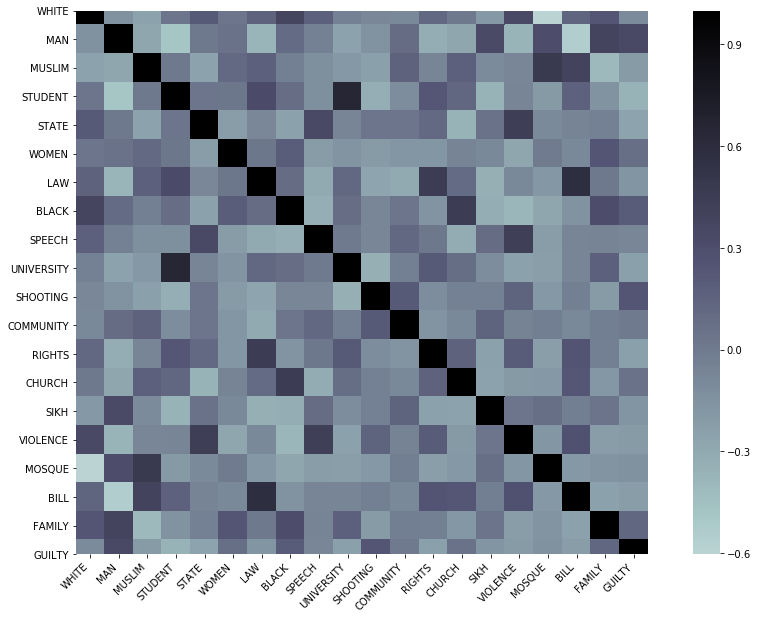

In [119]:
tk = [k[0] for k in Counter(chain(*df.keywords)).most_common(20)]

data = []

for row_k in tk:

    row_vals = []

    for col_k in tk:
        df_a = df[df.keywords.apply(lambda x: row_k in x)]
        df_b = df_a[df_a.keywords.apply(lambda x: col_k in x)]
        if len(df_b) == 0:
            row_vals.append(0)
        else:
            row_vals.append(round((len(df_b) / len(df_a)) * 100))

    data.append(row_vals)

d = pd.DataFrame(data, index=[*tk], columns=[*tk])

plt.figure(figsize=(16, 10))

corr = d.corr()
ax = sns.heatmap(corr, center=0, cmap='bone_r', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# Events Where Descent was Greater than the Mean

In [120]:
desc_base = df[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
desc_base = desc_base[desc_base.descent > round(desc_base.descent.mean())]
desc_base.sort_values('articles', ascending=False)

,start_end,ascent,descent,length,movement,articles,keywords
9,20150617_20150627,1,9,11,58,15584,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
79,20170811_20170821,4,6,11,31,12701,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
121,20181022_20181110,6,13,20,123,8798,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHITE]"
57,20161108_20161126,3,15,19,119,7374,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
41,20160611_20160626,2,13,16,109,4814,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
40,20160523_20160529,1,5,7,45,4017,"[LAW, LOUISIANA, LIVES, MATTER, BILL]"
62,20170129_20170212,7,7,15,191,2877,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."
61,20170119_20170129,1,9,11,118,2688,"[MAN, MUSLIM, WOMEN, FEDERAL, LAW, STATE, NELS..."
71,20170521_20170603,1,12,14,113,2571,"[PORTLAND, UNIVERSITY, MARYLAND, STABBING, STU..."
114,20180803_20180818,10,5,16,151,2356,"[WHITE, MAN, JONES, SPEECH, FACEBOOK, INFOWARS]"


In [121]:
desc_base[desc_base.keywords.apply(lambda x: 'BLACK' in x)]

,start_end,ascent,descent,length,movement,articles,keywords
32,20160221_20160305,2,11,14,118,1581,"[STUDENT, WHITE, MAN, MUSLIM, BLACK, STATE, WO..."
37,20160503_20160509,2,4,6,47,386,"[STUDENT, IOWA, UNIVERSITY, BLACK, WHITE]"
55,20161016_20161023,1,6,8,56,759,"[MUSLIM, SPEECH, CLINTON, STATES, MAN, TIMES, ..."


In [122]:
# data = []
# for keyword, count in Counter(descent_keywords).most_common(15):
#     descent_key = df[df.keywords.apply(lambda x: keyword in x)]
#     data.append([keyword, round(descent_key.articles.mean()), round(descent_key.movement.mean())])
    
# descent_df = pd.DataFrame(data, columns=['Keyowrd', 'Articles', 'Movement'])
# descent_df.sort_values('Articles', inplace=True, ascending=False)
# descent_df

# Events Where Length was Greater than the Mean

In [123]:
desc_base = df[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
desc_base = desc_base[desc_base.length > round(desc_base.length.mean())]
desc_base.sort_values('length', ascending=False)

,start_end,ascent,descent,length,movement,articles,keywords
121,20181022_20181110,6,13,20,123,8798,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHITE]"
57,20161108_20161126,3,15,19,119,7374,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
114,20180803_20180818,10,5,16,151,2356,"[WHITE, MAN, JONES, SPEECH, FACEBOOK, INFOWARS]"
41,20160611_20160626,2,13,16,109,4814,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
62,20170129_20170212,7,7,15,191,2877,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."
32,20160221_20160305,2,11,14,118,1581,"[STUDENT, WHITE, MAN, MUSLIM, BLACK, STATE, WO..."
71,20170521_20170603,1,12,14,113,2571,"[PORTLAND, UNIVERSITY, MARYLAND, STABBING, STU..."
67,20170409_20170422,10,3,14,168,3054,"[WHITE, MAN, CAMPAIGN, SIKH, STATE, SHOOTING, ..."
79,20170811_20170821,4,6,11,31,12701,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
61,20170119_20170129,1,9,11,118,2688,"[MAN, MUSLIM, WOMEN, FEDERAL, LAW, STATE, NELS..."


In [124]:
desc_base[desc_base.keywords.apply(lambda x: 'BLACK' in x)]

,start_end,ascent,descent,length,movement,articles,keywords
32,20160221_20160305,2,11,14,118,1581,"[STUDENT, WHITE, MAN, MUSLIM, BLACK, STATE, WO..."
43,20160705_20160714,6,3,10,45,4608,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
55,20161016_20161023,1,6,8,56,759,"[MUSLIM, SPEECH, CLINTON, STATES, MAN, TIMES, ..."
56,20161030_20161105,4,2,7,44,501,"[STUDENT, CHURCH, MISSISSIPPI, UNIVERSITY, BLA..."
123,20181125_20181202,5,2,8,167,1954,"[STATE, WHITE, STUDENT, SWASTIKAS, BLACK, COLL..."


In [125]:
base = df[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
base[base.descent <= round(base.descent.mean())].sort_values('articles', ascending=False)

,start_end,ascent,descent,length,movement,articles,keywords
43,20160705_20160714,6,3,10,45,4608,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
60,20170104_20170108,2,2,5,34,3948,"[CHICAGO, VIDEO, WHITE, VICTIM, MAN]"
67,20170409_20170422,10,3,14,168,3054,"[WHITE, MAN, CAMPAIGN, SIKH, STATE, SHOOTING, ..."
122,20181111_20181118,5,2,8,61,2893,"[FBI, WHITE, REPORTED, STUDENT, MAN]"
64,20170221_20170226,3,2,6,34,2851,"[KANSAS, INDIAN, SHOOTING, JEWISH, COMMUNITY]"
123,20181125_20181202,5,2,8,167,1954,"[STATE, WHITE, STUDENT, SWASTIKAS, BLACK, COLL..."
97,20180219_20180224,3,2,6,22,1902,"[WHITE, MAN, SPLC, FAMILY, NRA, LAW, LIFE, GUN]"
58,20161127_20161202,2,3,6,51,1711,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL..."
82,20170912_20170916,3,1,5,20,1686,"[WHITE, RESOLUTION, VIOLENCE, CHARLOTTESVILLE,..."
102,20180402_20180407,2,3,6,76,1630,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."


# Windows w/ White as a Keyword

In [126]:
white_events = df[df.keywords.apply(lambda x: 'WHITE' in x)]
white_events[['start_end', 'year', 'articles', 'movement', 'length', 'keywords']].sort_values('articles', ascending=False)

,start_end,year,articles,movement,length,keywords
9,20150617_20150627,2015,15584,58,11,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
79,20170811_20170821,2017,12701,31,11,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
121,20181022_20181110,2018,8798,123,20,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHITE]"
57,20161108_20161126,2016,7374,119,19,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
43,20160705_20160714,2016,4608,45,10,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
60,20170104_20170108,2017,3948,34,5,"[CHICAGO, VIDEO, WHITE, VICTIM, MAN]"
67,20170409_20170422,2017,3054,168,14,"[WHITE, MAN, CAMPAIGN, SIKH, STATE, SHOOTING, ..."
122,20181111_20181118,2018,2893,61,8,"[FBI, WHITE, REPORTED, STUDENT, MAN]"
62,20170129_20170212,2017,2877,191,15,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."
61,20170119_20170129,2017,2688,118,11,"[MAN, MUSLIM, WOMEN, FEDERAL, LAW, STATE, NELS..."


In [127]:
print(f'Average Length:   {white_events.length.mean():.1f}')
print(f'Average Descent:  {white_events.descent.mean():.1f}')
print(f'Average Articles: {white_events.articles.mean():.1f}')
print(f'Average Movement: {white_events.movement.mean():.1f}')

Average Length:   6.2
Average Descent:  3.0
Average Articles: 1657.0
Average Movement: 46.0


# Windows w/ Black as a Keyword

In [128]:
black_events = df[df.keywords.apply(lambda x: 'BLACK' in x)]
black_events[['start_end', 'year', 'articles', 'movement', 'length', 'keywords']].sort_values('articles', ascending=False)

,start_end,year,articles,movement,length,keywords
43,20160705_20160714,2016,4608,45,10,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
123,20181125_20181202,2018,1954,167,8,"[STATE, WHITE, STUDENT, SWASTIKAS, BLACK, COLL..."
32,20160221_20160305,2016,1581,118,14,"[STUDENT, WHITE, MAN, MUSLIM, BLACK, STATE, WO..."
59,20161221_20161224,2016,1017,21,4,"[MISSISSIPPI, CHURCH, MUSLIM, MAN, BLACK, WOMEN]"
51,20160927_20160929,2016,893,32,3,"[WHITE, MUSLIM, PEPE, MATTER, SCOTT, FROG, SYM..."
10,20150630_20150703,2015,849,27,4,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]"
69,20170501_20170505,2017,831,28,5,"[RELIGIOUS, WHITE, UNIVERSITY, BLACK, LAW, MAN..."
55,20161016_20161023,2016,759,56,8,"[MUSLIM, SPEECH, CLINTON, STATES, MAN, TIMES, ..."
48,20160830_20160902,2016,717,22,4,"[WHITE, LIVES, MATTER, MUSLIM, MOVEMENT, SPLC,..."
56,20161030_20161105,2016,501,44,7,"[STUDENT, CHURCH, MISSISSIPPI, UNIVERSITY, BLA..."


In [129]:
print(f'Average Length:   {black_events.length.mean():.1f}')
print(f'Average Descent:  {black_events.descent.mean():.1f}')
print(f'Average Articles: {black_events.articles.mean():.1f}')
print(f'Average Movement: {black_events.movement.mean():.1f}')

Average Length:   5.5
Average Descent:  2.6
Average Articles: 877.5
Average Movement: 38.8


# Windows w/ Women as a Keyword

In [130]:
women_events = df[df.keywords.apply(lambda x: 'WOMEN' in x)]
women_events[['start_end', 'year', 'articles', 'movement', 'length', 'keywords']].sort_values('articles', ascending=False)

,start_end,year,articles,movement,length,keywords
57,20161108_20161126,2016,7374,119,19,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
61,20170119_20170129,2017,2688,118,11,"[MAN, MUSLIM, WOMEN, FEDERAL, LAW, STATE, NELS..."
102,20180402_20180407,2018,1630,76,6,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."
100,20180310_20180318,2018,1628,111,9,"[WHITE, WOMEN, STATE, STUDENT, IMMIGRATION]"
32,20160221_20160305,2016,1581,118,14,"[STUDENT, WHITE, MAN, MUSLIM, BLACK, STATE, WO..."
49,20160912_20160915,2016,1409,18,4,"[MUSLIM, SET, WOMEN, MOSQUE, INCIDENT, MAN, NYPD]"
59,20161221_20161224,2016,1017,21,4,"[MISSISSIPPI, CHURCH, MUSLIM, MAN, BLACK, WOMEN]"
51,20160927_20160929,2016,893,32,3,"[WHITE, MUSLIM, PEPE, MATTER, SCOTT, FROG, SYM..."
55,20161016_20161023,2016,759,56,8,"[MUSLIM, SPEECH, CLINTON, STATES, MAN, TIMES, ..."
38,20160511_20160513,2016,753,21,3,"[WHITE, THINK, LAW, SCHOOL, HATERS, REPUBLICAN..."


In [131]:
print(f'Average Length:   {women_events.length.mean():.1f}')
print(f'Average Descent:  {women_events.descent.mean():.1f}')
print(f'Average Articles: {women_events.articles.mean():.1f}')
print(f'Average Movement: {women_events.movement.mean():.1f}')

Average Length:   5.3
Average Descent:  3.0
Average Articles: 872.8
Average Movement: 37.6


# Windows with Muslim as a Keyword

In [132]:
muslim_events = df[df.keywords.apply(lambda x: 'MUSLIM' in x)]
muslim_events[['start_end', 'year', 'articles', 'movement', 'length', 'keywords']].sort_values('articles', ascending=False)

,start_end,year,articles,movement,length,keywords
57,20161108_20161126,2016,7374,119,19,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
62,20170129_20170212,2017,2877,191,15,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."
61,20170119_20170129,2017,2688,118,11,"[MAN, MUSLIM, WOMEN, FEDERAL, LAW, STATE, NELS..."
46,20160812_20160820,2016,1752,43,9,"[MUSLIM, IMAM, MAN, MOSQUE, SHOT]"
58,20161127_20161202,2016,1711,51,6,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL..."
65,20170319_20170326,2017,1710,61,8,"[COMMUNITY, WHITE, MAN, MUSLIM, INDIAN]"
32,20160221_20160305,2016,1581,118,14,"[STUDENT, WHITE, MAN, MUSLIM, BLACK, STATE, WO..."
25,20151207_20151212,2015,1481,35,6,"[MUSLIM, COMMUNITY, SPEECH, ISLAMIC, GRAFFITI,..."
49,20160912_20160915,2016,1409,18,4,"[MUSLIM, SET, WOMEN, MOSQUE, INCIDENT, MAN, NYPD]"
11,20150713_20150718,2015,1349,36,6,"[FLAG, CONFEDERATE, WHITE, MUSLIM, CHARLESTON,..."


In [133]:
print(f'Average Length:   {muslim_events.length.mean():.1f}')
print(f'Average Descent:  {muslim_events.descent.mean():.1f}')
print(f'Average Articles: {muslim_events.articles.mean():.1f}')
print(f'Average Movement: {muslim_events.movement.mean():.1f}')

Average Length:   6.2
Average Descent:  3.6
Average Articles: 1011.4
Average Movement: 48.5


# Evaluation - Windows w/ Muslim as a Keyword

In [134]:
muslim_total = df[df.keywords.apply(lambda x: 'MUSLIM' in x)]
muslim_has_w = muslim_total[muslim_total.keywords.apply(lambda x: 'WHITE' in x)]
muslim_non_w = muslim_total[muslim_total.keywords.apply(lambda x: 'WHITE' not in x)]

print(f'With White as a Keyword: {len(muslim_has_w) / len(muslim_total) * 100}')
print(muslim_has_w[['articles', 'movement', 'length', 'descent']].agg(['mean']))

print('#' * 50)

print(f'Without White as a Keyword: {len(muslim_non_w) / len(muslim_total) * 100}')
print(muslim_non_w[['articles', 'movement', 'length', 'descent']].agg(['mean']))

muslim_non_w[['start_end', 'articles', 'movement', 'length', 'keywords']].sort_values('articles', ascending=False)

With White as a Keyword: 52.5
         articles   movement    length   descent
mean  1188.952381  52.904762  6.428571  3.904762
##################################################
Without White as a Keyword: 47.5
        articles   movement    length   descent
mean  815.210526  43.631579  6.052632  3.315789


,start_end,articles,movement,length,keywords
46,20160812_20160820,1752,43,9,"[MUSLIM, IMAM, MAN, MOSQUE, SHOT]"
58,20161127_20161202,1711,51,6,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL..."
25,20151207_20151212,1481,35,6,"[MUSLIM, COMMUNITY, SPEECH, ISLAMIC, GRAFFITI,..."
49,20160912_20160915,1409,18,4,"[MUSLIM, SET, WOMEN, MOSQUE, INCIDENT, MAN, NYPD]"
74,20170711_20170715,1313,58,5,"[MUSLIM, LAW, UNIVERSITY, SESSIONS, RIGHTS, LG..."
33,20160306_20160312,1299,29,7,"[ISLAM, STATE, MUSLIM, REPUBLICAN, STATES, TWI..."
72,20170618_20170627,1294,74,10,"[MUSLIM, MOSQUE, MAN, VIRGINIA, HASSANEN, TEXAS]"
59,20161221_20161224,1017,21,4,"[MISSISSIPPI, CHURCH, MUSLIM, MAN, BLACK, WOMEN]"
23,20151109_20151116,694,39,8,"[STUDENT, DIGITAL, UNIVERSITY, LAW, DESERVES, ..."
21,20151009_20151018,591,51,10,"[LAW, MUSLIM, AREA, CODE, DELIVERABLE, DESERVE..."


In [135]:
muslim_non_w = muslim_total[muslim_total.keywords.apply(lambda x: 'WHITE' not in x)]
muslim_non_m = muslim_non_w[muslim_non_w.keywords.apply(lambda x: 'MAN' not in x)]
print(muslim_non_m[['articles', 'movement', 'length', 'descent']].agg(['mean']))
muslim_non_m[['start_end', 'articles', 'length', 'movement', 'keywords']]

        articles   movement  length   descent
mean  725.307692  44.923077     6.0  3.384615


,start_end,articles,length,movement,keywords
0,20150308_20150311,273,4,53,"[MUSLIM, VIOLENCE, STATE, DALLAS, TEXAS, SHOOT..."
4,20150503_20150506,176,4,33,"[TEXAS, SPEECH, MUSLIM, GELLER, EVENT, GARLAND]"
21,20151009_20151018,591,10,51,"[LAW, MUSLIM, AREA, CODE, DELIVERABLE, DESERVE..."
23,20151109_20151116,694,8,39,"[STUDENT, DIGITAL, UNIVERSITY, LAW, DESERVES, ..."
25,20151207_20151212,1481,6,35,"[MUSLIM, COMMUNITY, SPEECH, ISLAMIC, GRAFFITI,..."
28,20160109_20160115,515,7,87,"[MUSLIM, WOMEN, HAMID, RALLY, BACKERS, RHETORI..."
30,20160202_20160206,311,5,36,"[MUSLIM, OBAMA, MOSQUE, MARTIN, CRUZ, VOTERS, ..."
33,20160306_20160312,1299,7,29,"[ISLAM, STATE, MUSLIM, REPUBLICAN, STATES, TWI..."
42,20160627_20160701,379,5,31,"[MUSLIM, COMMUNITY, LEADERS, RELIGIOUS, INCIDE..."
56,20161030_20161105,501,7,44,"[STUDENT, CHURCH, MISSISSIPPI, UNIVERSITY, BLA..."


# Evaluation - Windows w/ Women as a Keyword

In [136]:
women_total = df[df.keywords.apply(lambda x: 'WOMEN' in x)]
women_has_w = women_total[women_total.keywords.apply(lambda x: 'WHITE' in x)]
women_non_w = women_total[women_total.keywords.apply(lambda x: 'WHITE' not in x)]

print(f'With White as a Keyword: {len(women_has_w) / len(women_total) * 100}')
print(women_has_w[['articles', 'movement', 'length', 'descent']].agg(['mean']))

print('#' * 50)

print(f'Without White as a Keyword: {len(women_non_w) / len(women_total) * 100}')
print(women_non_w[['articles', 'movement', 'length', 'descent']].agg(['mean']))

women_non_w[['start_end', 'articles', 'movement', 'length', 'keywords']].sort_values('articles', ascending=False)

With White as a Keyword: 51.724137931034484
         articles   movement  length   descent
mean  1187.933333  46.933333     6.2  3.933333
##################################################
Without White as a Keyword: 48.275862068965516
        articles   movement    length  descent
mean  535.214286  27.571429  4.357143      2.0


,start_end,articles,movement,length,keywords
102,20180402_20180407,1630,76,6,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."
49,20160912_20160915,1409,18,4,"[MUSLIM, SET, WOMEN, MOSQUE, INCIDENT, MAN, NYPD]"
59,20161221_20161224,1017,21,4,"[MISSISSIPPI, CHURCH, MUSLIM, MAN, BLACK, WOMEN]"
104,20180417_20180422,611,22,6,"[STUDENT, WOMEN, DEPUTIES, LAW, MEN, RESTAURAN..."
28,20160109_20160115,515,87,7,"[MUSLIM, WOMEN, HAMID, RALLY, BACKERS, RHETORI..."
34,20160401_20160403,442,16,3,"[STATION, TROOPER, VIRGINIA, WOMEN, ANGELES, G..."
39,20160516_20160519,410,32,4,"[IOWA, OWENS, STUDENT, CITY, UNIVERSITY, FAMIL..."
111,20180709_20180714,315,28,6,"[MAN, PUERTO, WOMEN, VIDEO, OFFICER, SHIRT, WE..."
30,20160202_20160206,311,36,5,"[MUSLIM, OBAMA, MOSQUE, MARTIN, CRUZ, VOTERS, ..."
36,20160418_20160420,265,11,3,"[STUDENT, CRUZ, TED, WOMEN, REPUBLICAN, CHURCH..."


In [137]:
women_non_w = women_total[women_total.keywords.apply(lambda x: 'WHITE' not in x)]
women_non_m = women_non_w[women_non_w.keywords.apply(lambda x: 'MAN' not in x)]

print(f'Without White or Man as a Keyword: {len(women_non_m) / len(women_total) * 100}')
print(women_non_m[['articles', 'movement', 'length', 'descent']].agg(['mean']))

women_non_m[['start_end', 'articles', 'length', 'movement', 'keywords']]

Without White or Man as a Keyword: 31.03448275862069
        articles   movement    length   descent
mean  465.888889  32.555556  4.444444  2.111111


,start_end,articles,length,movement,keywords
20,20151002_20151004,218,3,12,"[OREGON, CHRISTIANS, SHOOTING, OBAMA, MERCER, ..."
28,20160109_20160115,515,7,87,"[MUSLIM, WOMEN, HAMID, RALLY, BACKERS, RHETORI..."
30,20160202_20160206,311,5,36,"[MUSLIM, OBAMA, MOSQUE, MARTIN, CRUZ, VOTERS, ..."
36,20160418_20160420,265,3,11,"[STUDENT, CRUZ, TED, WOMEN, REPUBLICAN, CHURCH..."
39,20160516_20160519,410,4,32,"[IOWA, OWENS, STUDENT, CITY, UNIVERSITY, FAMIL..."
102,20180402_20180407,1630,6,76,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."
104,20180417_20180422,611,6,22,"[STUDENT, WOMEN, DEPUTIES, LAW, MEN, RESTAURAN..."
107,20180612_20180614,82,3,0,[WOMEN]
117,20180913_20180915,151,3,17,[WOMEN]


# Evaluation - Windows w/ Black as a Keyword

In [138]:
black_total = df[df.keywords.apply(lambda x: 'BLACK' in x)]
black_has_w = black_total[black_total.keywords.apply(lambda x: 'WHITE' in x)]
black_non_w = black_total[black_total.keywords.apply(lambda x: 'WHITE' not in x)]

print(f'With White as a Keyword: {len(black_has_w) / len(black_total) * 100}')
print(black_has_w[['articles', 'movement', 'length', 'descent', 'tone']].agg(['mean']))

print('#' * 50)

print(f'Without White as a Keyword: {len(black_non_w) / len(black_total) * 100}')
print(black_non_w[['articles', 'movement', 'length', 'descent', 'tone']].agg(['mean']))

black_non_w[['start_end', 'articles', 'movement', 'length', 'keywords']].sort_values('articles', ascending=False)

With White as a Keyword: 78.94736842105263
        articles  movement    length  descent  tone
mean  945.933333      42.4  5.666667      2.8  -5.6
##################################################
Without White as a Keyword: 21.052631578947366
      articles  movement  length  descent  tone
mean     621.0      25.5    4.75      2.0 -5.25


,start_end,articles,movement,length,keywords
59,20161221_20161224,1017,21,4,"[MISSISSIPPI, CHURCH, MUSLIM, MAN, BLACK, WOMEN]"
10,20150630_20150703,849,27,4,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]"
56,20161030_20161105,501,44,7,"[STUDENT, CHURCH, MISSISSIPPI, UNIVERSITY, BLA..."
15,20150817_20150820,117,10,4,"[COMMUNITY, FBI, MAN, WOMEN, BLACK, KING, LIVE..."


# % of Events Where Keyword Appears in Top 3 Keywords

           keyword  total
16     VIOLENCE: 9     78
8       SPEECH: 18     67
0        WHITE: 62     65
2       MUSLIM: 40     65
22        LIVES: 7     57
15       MOSQUE: 9     56
1          MAN: 47     51
3      STUDENT: 30     50
9   UNIVERSITY: 16     50
10    SHOOTING: 14     50
11   COMMUNITY: 12     50
26      CLINTON: 6     50
13      CHURCH: 10     50
14        SIKH: 10     50
18       MATTER: 7     43
25        TEXAS: 6     33
5        WOMEN: 29     31
6          LAW: 27     30
4        STATE: 29     28
27        RALLY: 6     17
28   REPUBLICAN: 6     17
29        OBAMA: 6     17
7        BLACK: 19     16
19          GAY: 7     14
20      VICTIMS: 7     14
21       GUILTY: 7     14
24       JEWISH: 7     14
17         BILL: 8     12
12      RIGHTS: 11      9
23       FAMILY: 7      0
30       SCHOOL: 6      0


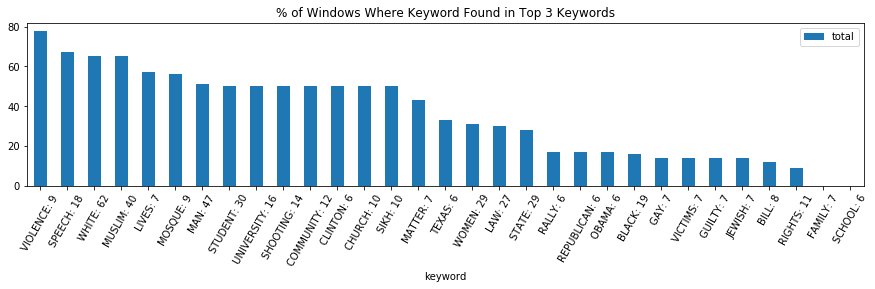

In [139]:
keyword_data = {}
for keyword in tk_df.keywords:
    count = 0
    k = keyword.split(':')[0]
    windows = df[df.keywords.apply(lambda x: k in x)]['keywords']
    for window in windows:
        if k in window[:3]:
            count += 1
    keyword_data.update({keyword: round((count / len(windows)) * 100)})
key_perc = pd.DataFrame([(k, v) for k, v in keyword_data.items()], columns=['keyword', 'total'])
key_perc.sort_values('total', inplace=True, ascending=False)

# print(key_perc[key_perc.total >= 50])
print(key_perc)

key_perc.plot(x='keyword', y='total', kind='bar', figsize=(15, 3), rot=60, title='% of Windows Where Keyword Found in Top 3 Keywords')